In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


from skimage import io, color, util
from skimage.transform import hough_line, hough_line_peaks
from skimage.transform import probabilistic_hough_line
from skimage.feature import canny
from skimage.draw import line
from skimage import data
from matplotlib import cm



# Hough Transform

tehnica pentru a detecta diverse forme care pot fi descrise in fomra matematica

## HT pentru linii

O linie este descrisa de ecuatia y = mx + c sau in forma parametrica ca 
ro = x cos(theta) + y sin(theta) => o imagine poate fi descrisa de doi paramterii (ro, theta) in care *ro* reprezinta distanta de la origine la dreapta iar *theta* este unghiul format de axa orizontala si perpendiculara la dreapta.

Primul pas pe care il realizeaza transformata Hough este sa creeze un spatiu 2D (numit **acumulator** - cu *ro* pentru linii si *theta* pentru coloane) pe care il seteaza initial cu valori de zero. Dimensiunea acestui spatiu influenteaza acuratetea transformarii. Daca se doreste o precizie a unghiurilor de 1 grad atunci spatiul va avea 180 de coloane. In cazul dimensiunii dormim sa putem sa detectam toate liniile care apar in imagine => dimensiunea maxima pe care poate sa o aiba o linie intr-o imagine este diagonala => acumulatorul va avea atatea randuri egale cu diagonala imaginii. 

Urmatorul pas este sa trecem prin fiecare pixel al imaginii. Pentru un pixel cunoastem coordonatele (x,y) ;i le introducem in ecuatia ro = x cos(theta) + y sin(theta) pentru fiecare valoare theta = 0,1,....180 incrementand perechile (ro, theta) din acumulator. Practic sistemul este un sistem de 'votare' a perechilor (ro, theta). La final, dupa parcurgerea tutoror pixelilor din imagine perechile cu cele mai multe voturi vor reprezenta liniile descoperite in imagine. De exemplu daca (50, 90) este perechea cu maximul de voturi => in imagine exista o linie la distanta de 50 fata de origine si la un unghi de 90 de grade. Acesta animatie exemplifica mai bine procesul(opencv24-python-tutorials.readthedocs.io) :


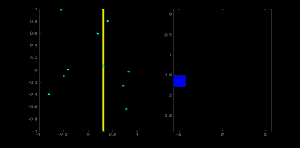



OpenCV implementation is based on Robust Detection of Lines Using the Progressive Probabilistic Hough Transform by Matas, J. and Galambos, C. and Kittler, J.V.. The function used is cv2.HoughLinesP(). It has two new arguments.
minLineLength - Minimum length of line. Line segments shorter than this are rejected.
maxLineGap - Maximum allowed gap between line segments to treat them as single line.

[[[ 612.           1.2566371]]

 [[ 615.           1.2566371]]

 [[ 473.           1.5882496]]

 [[ 480.           1.5882496]]

 [[-271.           2.75762  ]]

 [[-281.           2.75762  ]]]


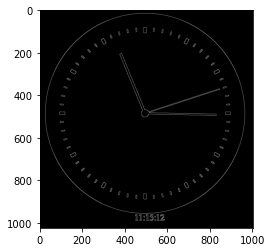

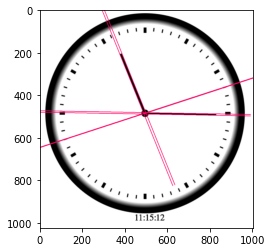

In [128]:
img = cv.imread('clock2.png')
gray_img = color.rgb2gray(img)
edges = cv.Canny(img,100,200)

plt.figure()
plt.imshow(edges, cmap='gray')

lines = cv.HoughLines(edges,1,np.pi/180,150)
print(lines)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        
        x12 = x22 = int(img.shape[0] / 2)
        y12 = y22 = int(img.shape[1] / 2)
        
#         print('x0y0', x0, y0 )
#         print('x1y1', x1, y1 )
#         print('x2y2', x2, y2 )



        cv.line(img,(x1,y1),(x2,y2),(255,0,100),2)
#         cv.line(img,(int(img.shape[0] - x0),int(img.shape[1] - y0)),(x12,y12),(255,0,100),2)


plt.figure()
plt.imshow(img, cmap='gray')


In [165]:
def myFunc(e):
    return e['dist']


[[383 205 489 467]]
302.0


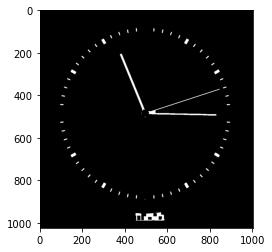

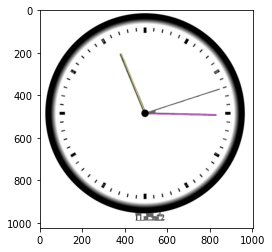

In [192]:
img = cv.imread('clock2.png')
gray_img = color.rgb2gray(img)
edges = cv.Canny(img,100,200)
kernel = np.ones((11,11),np.uint8)
kernel1 = np.ones((12,12),np.uint8)

edges = cv.dilate(edges,kernel,iterations = 1)
edges = cv2.erode(edges,kernel1,iterations = 1)

plt.figure()
plt.imshow(edges, cmap='gray')


minLineLength = 1000
maxLineGap = 11
lines = cv.HoughLinesP(edges,1,np.pi/180, 15 ,minLineLength,maxLineGap)
l=[]

# l -> long, s -> short
xl1, xl2, yl1, yl2 = 0, 0, 0, 0
xs1, xs2, ys1, ys2 = 0, 0, 0, 0
maxi = 0
i = 0
print(lines[0])
for line in lines:
     # getting the values from the line
    x1, y1, x2, y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(100,100,100),2)
    
    dist = np.sqrt( (x2 - x1)**2 + (y2 - y1)** 2)
    l.append({'dist':dist, 'index':i})
    i = i + 1

#     if(dist >= maxi):
#         maxi = dist
#         xl1, xl2, yl1, yl2 = x1, x2, y1, y2
    
# maximum = minutes    
# second maxim = hours

l.sort(reverse=True,key=myFunc)
minutes_index = l[0]['index']
hours_index = l[1]['index']
print(l[0]['dist'])
x1, y1, x2, y2 = lines[minutes_index][0]
xl1, xl2, yl1, yl2 = x1, x2, y1, y2
x1, y1, x2, y2 = lines[hours_index][0]
xs1, xs2, ys1, ys2 = x1, x2, y1, y2

cv.line(img,(xl1,yl1),(xl2,yl2),(255,100,255),2)
cv.line(img,(xs1,ys1),(xs2,ys2),(255,255,100),2)

    
width, height, ch = img.shape
xcenter = int(width / 2)
ycenter = int(height / 2)


hour1 = abs(xcenter - xs1)
hour2 = abs(xcenter - xs2)

if(hour1 > hour2):
    xhour = xs1
    yhour = ys1
else:
    xhour = xs2
    yhour = ys2


min1 = abs(xcenter - xl1)
min2 = abs(xcenter - xl2)

if(min1 > min2):
    xmin = xl1
    ymin = yl1
else:
    xmin = xl2
    ymin = yl2

    
plt.figure()
plt.imshow(img, cmap='gray')    
    
    
    
    
    
    
    
    

In [193]:
import math

l1 = np.sqrt( ((xcenter - xhour) ** 2) + ((ycenter - yhour) ** 2) )

l2 = ycenter

l3 = np.sqrt( ((xcenter - xhour) ** 2) + ((0 - yhour) ** 2) )

cos_theta_hour = ( ( (l1) ** 2 ) + ( (l2) ** 2 ) - ( (l3) ** 2) ) / ( 2 * (l1) * (l2) )
theta_hours_radian = math.acos(cos_theta_hour)
theta_hours = math.degrees(theta_hours_radian)

if(xhour > xcenter):
    right=1

else:
    right=0


if(right==1):
    hour = int(theta_hours / (6*5))

if(right==0):
    hour = 12 - (int(theta_hours / (6*5)))

if(hour==0):
    hour=12
    
print(hour)
    

12


In [124]:
# img = io.imread("clock2.png")
# gry_img = color.rgb2gray(img)

# plt.figure()
# plt.imshow(gray_img, cmap='gray')
# grey_img[gray_img < 50] = 0
# grey_img[gray_img > 255] = 255

# H,W = gray_img.shape
# mask = np.zeros(gray_img.shape)

# # edges = cv.Canny(gray_img, 100, 200)


# img = cv.imread('clock2.png')
# gray_img = color.rgb2gray(img)
# edges = cv.Canny(img,100,200)

# circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)


# new_img = color.gray2rgb(edges)
# print(new_img.shape)

# plt.figure()
# plt.imshow(new_img, cmap='gray')